### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [10]:
import matplotlib.pyplot as plt
import px
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
# Load data from a CSV file
data = pd.read_csv('data/coupons.csv')

In [11]:
# Display the first 5 rows of the DataFrame
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [12]:
#  Retrieve and display column details of the DataFrame, including data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [13]:
#  Count and display the number of null values for each column
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

# The analysis reveals that there are 6 columns with null values, 
# with the 'car' column having the highest number of null entries.

In [14]:
# Calculate and display statistical summary of numerical columns, including percentiles, mean, and standard deviation
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


3. Decide what to do about your missing data -- drop, replace, other...

In [15]:
# Retrieve and display all unique values in the 'car' column for better understanding
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [17]:
# Create a new DataFrame as a copy of the existing one
df = data

In [18]:
# Replace null values in the 'car' column with the string 'no'
df['car'] = df['car'].fillna(value='no')

In [19]:
# Update 'car' column values: replace specified values with 'yes' or 'no' as appropriate
df = df.replace({'car': {
    'Scooter and motorcycle': 'yes',
    'crossover': 'yes',
    'Mazda5': 'yes',
    'do not drive': 'no',
    'Car that is too old to install Onstar :D': 'no'
}})

In [20]:
# Display the unique values in the 'car' column after performing replacements
df['car'].unique()

array(['no', 'yes'], dtype=object)

In [22]:
# Drop rows with any remaining null values from the DataFrame
df = df.dropna()

4. What proportion of the total observations chose to accept the coupon? 



In [23]:
# Calculate the count of accepted coupons
coupon_accepted = df['Y'].value_counts()[1]

# Calculate the total count of offered coupons
total_coupon_offered = df['Y'].count()

# Compute the proportion of coupon acceptance as a percentage
proportion_of_coupon_acceptance = round((coupon_accepted / total_coupon_offered) * 100, 2)

proportion_of_coupon_acceptance

56.93

5. Use a bar plot to visualize the `coupon` column.

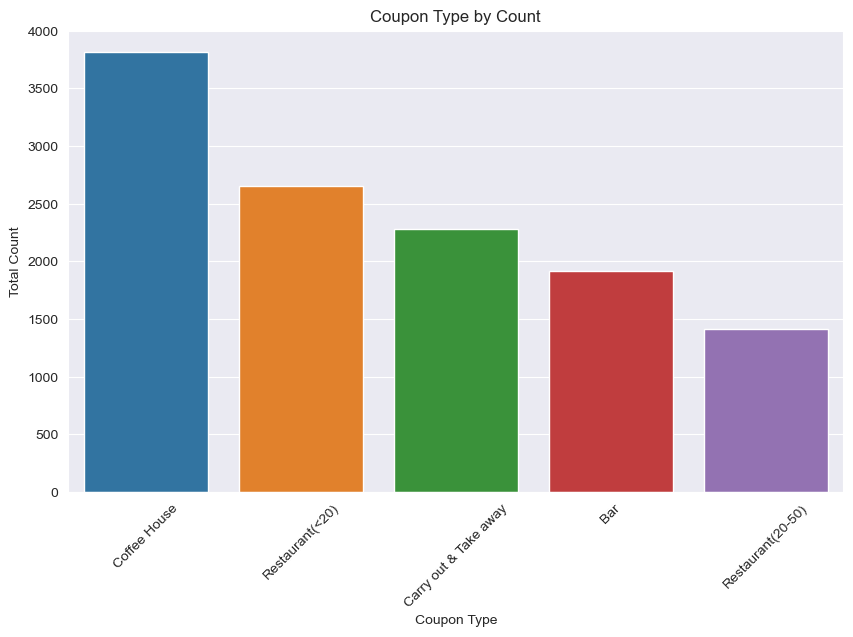

In [26]:
# Calculate the counts of each unique value in the 'coupon' column
coupon_counts = df['coupon'].value_counts()

# Generate a bar plot to display the counts of each unique coupon type
plt.figure(figsize=(10, 6))  # Optional: Set the figure size for better visualization
bar_plot = sns.barplot(x=coupon_counts.index, y=coupon_counts.values)
bar_plot.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
bar_plot.set(xlabel='Coupon Type', ylabel='Total Count')  # Set axis labels
bar_plot.set_title('Coupon Type by Count')  # Set the plot title

plt.show()  # Display the plot

6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


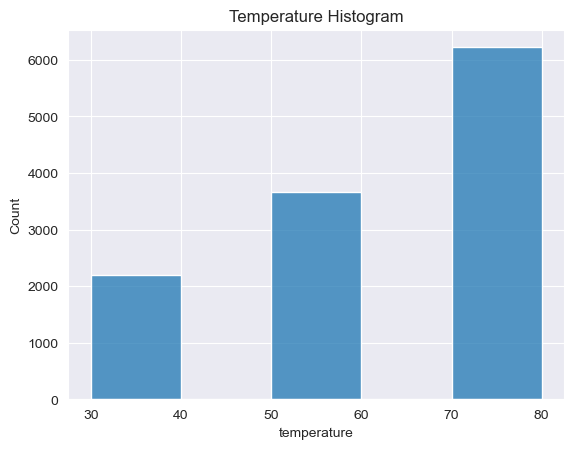

In [31]:
# Create a histogram to visualize the distribution of 'temperature' values with bins of width 10
temperature_histogram = sns.histplot(data=df, x='temperature', binwidth=10)
temperature_histogram.set_title('Temperature Histogram')  # Set the title for the histogram

plt.show()  # Display the plot

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [32]:
# Retrieve and display all unique values in the 'coupon' column to understand the available choices
df['coupon'].unique()


array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

In [33]:
# Filter the DataFrame to include only rows where the 'coupon' column is 'Bar'
df_bar_coupons = df[df['coupon'] == 'Bar']


In [34]:
# Display the first 5 rows of the filtered DataFrame to verify that only 'Bar' coupons are included
df_bar_coupons.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


In [35]:
# Check the dimensions of the filtered DataFrame to see the number of rows and columns
df_bar_coupons.shape


(1913, 26)

2. What proportion of bar coupons were accepted?


In [36]:
# Calculate the count of accepted 'Bar' coupons
bar_coupon_accepted = df_bar_coupons['Y'].value_counts().get(1, 0)  # Use .get() to handle cases where value might not exist

# Calculate the total count of 'Bar' coupons offered
total_bar_coupon_offered = df_bar_coupons['Y'].count()

# Calculate the proportion of 'Bar' coupon acceptance as a percentage
proportion_of_bar_coupon_acceptance = round((bar_coupon_accepted / total_bar_coupon_offered) * 100, 2)

proportion_of_bar_coupon_acceptance


41.19

In [37]:
# Calculate the count of 'Bar' coupons not accepted
bar_coupon_not_accepted = df_bar_coupons['Y'].value_counts().get(0, 0)  # Use .get() to handle cases where value might not exist

# Calculate the total count of 'Bar' coupons offered
total_bar_coupon_offered = df_bar_coupons['Y'].count()

# Calculate the proportion of 'Bar' coupon not acceptance as a percentage
proportion_of_bar_coupon_not_accepted = round((bar_coupon_not_accepted / total_bar_coupon_offered) * 100, 2)

proportion_of_bar_coupon_not_accepted


58.81

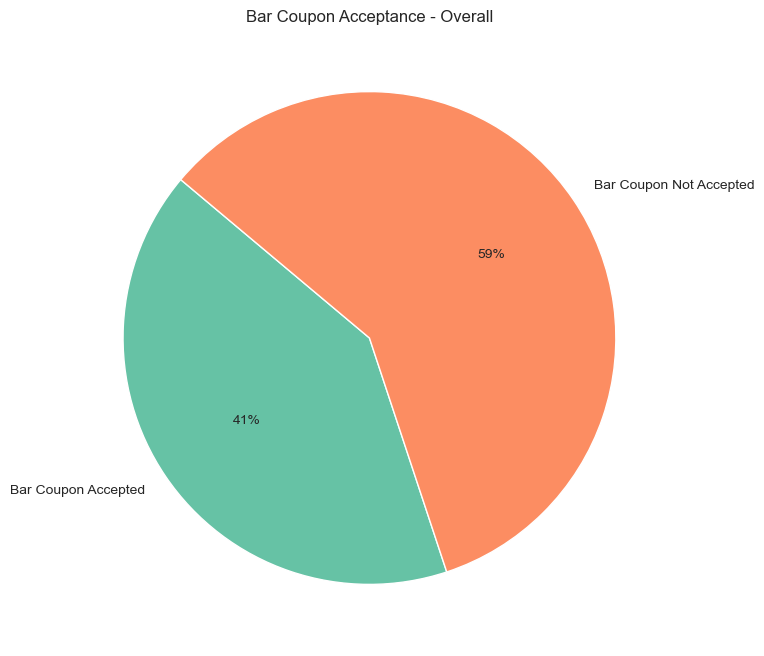

In [44]:
# Define the data for the pie chart
data = [proportion_of_bar_coupon_acceptance, proportion_of_bar_coupon_not_accepted]
labels = ['Bar Coupon Accepted', 'Bar Coupon Not Accepted']

# Define Seaborn color palette to use
colors = sns.color_palette('Set2')[0:2]

# Create a pie chart
plt.figure(figsize=(8, 8))  # Optional: Set the figure size for better visualization
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%', startangle=140)
plt.title('Bar Coupon Acceptance - Overall')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [46]:
# Display all unique values in the 'coupon' column to verify the filtered data
df_bar_coupons['Bar'].unique()


array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [52]:
# Ensure you're working with a copy of the DataFrame if needed
df_bar_coupons = df_bar_coupons.copy()

# Define a list of more frequent entries
frequent_entries = ['gt8', '4~8']

# Create a new column with condition-based values
df_bar_coupons.loc[:, 'Is_Frequent_Visitor'] = np.where(df_bar_coupons['Bar'].isin(frequent_entries), 1, 0)

# Validate the new column by checking the count of unique values
value_counts = df_bar_coupons['Is_Frequent_Visitor'].value_counts()
print(value_counts)

# Calculate the total counts of frequent and non-frequent bar visitors
total_frequent_visitors = df_bar_coupons['Is_Frequent_Visitor'].sum()
total_non_frequent_visitors = df_bar_coupons['Is_Frequent_Visitor'].count() - total_frequent_visitors


# Print total counts for verification
print(f"Total who went to the bar frequently = {total_frequent_visitors}")
print(f"Total who did not go to the bar frequently = {total_non_frequent_visitors}")

# The new column 'Is_Frequent_Visitor' indicates whether a person is a frequent visitor to the bar (1) or not (0)

Is_Frequent_Visitor
0    1720
1     193
Name: count, dtype: int64
Total who went to the bar frequently = 193
Total who did not go to the bar frequently = 1720


In [53]:
# Calculate the count of bar coupons accepted by frequent visitors
bar_coupon_accepted_frequent_visitors = df_bar_coupons[df_bar_coupons['Is_Frequent_Visitor'] == 1]['Y'].value_counts().get(1, 0)

# Calculate the total number of bar coupons offered to frequent visitors
total_bar_coupon_offered_frequent_visitors = df_bar_coupons[df_bar_coupons['Is_Frequent_Visitor'] == 1]['Y'].count()

# Calculate the proportion of bar coupon acceptance among frequent visitors
proportion_of_bar_coupon_acceptance_frequent_visitors = round(
    (bar_coupon_accepted_frequent_visitors / total_bar_coupon_offered_frequent_visitors) * 100, 2
)

# Print the proportion of bar coupon acceptance for frequent visitors
print(proportion_of_bar_coupon_acceptance_frequent_visitors)


76.17


In [54]:
# Calculate the count of bar coupons accepted by less frequent visitors
bar_coupon_accepted_less_frequent_visitors = df_bar_coupons[df_bar_coupons['Is_Frequent_Visitor'] == 0]['Y'].value_counts().get(1, 0)

# Calculate the total number of bar coupons offered to less frequent visitors
total_bar_coupon_offered_less_frequent_visitors = df_bar_coupons[df_bar_coupons['Is_Frequent_Visitor'] == 0]['Y'].count()

# Calculate the proportion of bar coupon acceptance among less frequent visitors
proportion_of_bar_coupon_acceptance_less_frequent_visitors = round(
    (bar_coupon_accepted_less_frequent_visitors / total_bar_coupon_offered_less_frequent_visitors) * 100, 2
)

# Print the proportion of bar coupon acceptance for less frequent visitors
print(proportion_of_bar_coupon_acceptance_less_frequent_visitors)


37.27


From the analysis, we observe that frequent visitors to the bar have a higher coupon acceptance rate of 76%, compared to less frequent visitors, who have a lower acceptance rate of 37%. This indicates that frequent visitors are more likely to accept bar coupons, showing a stronger interest compared to their less frequent counterparts.

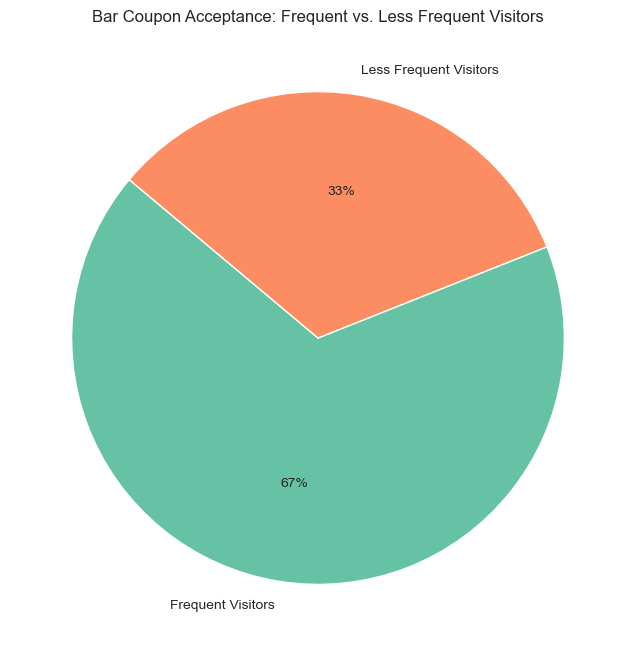

In [56]:
# Define the data for the pie chart
data = [
    proportion_of_bar_coupon_acceptance_frequent_visitors,
    proportion_of_bar_coupon_acceptance_less_frequent_visitors
]
labels = ['Frequent Visitors', 'Less Frequent Visitors']

# Define Seaborn color palette to use
colors = sns.color_palette('Set2')[0:2]

# Create the pie chart
plt.figure(figsize=(8, 8))  # Optional: Set the figure size for better visualization
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%', startangle=140)
plt.title('Bar Coupon Acceptance: Frequent vs. Less Frequent Visitors')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [58]:
# Define a function to check conditions and return 1 or 0
def check_conditions(row):
    # Define sets for better performance
    frequent_bars = {'1~3', 'gt8', '4~8'}
    target_ages = {'46', '26', '31', '41', '50plus', '36'}
    
    # Check if the conditions are met
    if row['Bar'] in frequent_bars and row['age'] in target_ages:
        return 1
    else:
        return 0

# Apply the function to create a new column
df_bar_coupons['Bar_Frequent_Age'] = df_bar_coupons.apply(check_conditions, axis=1)

# Display a sample of 10 rows to validate the new column based on the applied conditions
df_bar_coupons[['Bar', 'age', 'Bar_Frequent_Age']].sample(10, random_state=42)

,Bar,age,Bar_Frequent_Age
9450,less1,50plus,0
839,never,50plus,0
12353,less1,31,0
11736,1~3,21,0
2995,gt8,21,0
11636,less1,21,0
558,never,46,0
3831,never,50plus,0
4684,never,31,0
8271,less1,36,0


In [59]:
# Calculate the count of bar coupons accepted by high frequent visitors with elderly age
bar_coupon_accepted_high_freq_elderly = df_bar_coupons[df_bar_coupons['Bar_Frequent_Age'] == 1]['Y'].value_counts().get(1, 0)

# Calculate the total number of bar coupons offered to high frequent visitors with elderly age
total_bar_coupon_offered_high_freq_elderly = df_bar_coupons[df_bar_coupons['Bar_Frequent_Age'] == 1]['Y'].count()

# Calculate the proportion of bar coupon acceptance among high frequent visitors with elderly age
if total_bar_coupon_offered_high_freq_elderly > 0:
    proportion_of_bar_coupon_acceptance_high_freq_elderly = round(
        (bar_coupon_accepted_high_freq_elderly / total_bar_coupon_offered_high_freq_elderly) * 100, 2
    )
else:
    proportion_of_bar_coupon_acceptance_high_freq_elderly = 0

# Print the proportion of bar coupon acceptance for high frequent visitors with elderly age
print(proportion_of_bar_coupon_acceptance_high_freq_elderly)


68.98


In [61]:
# Calculate the count of bar coupons accepted by less frequent visitors with younger age
bar_coupon_accepted_less_freq_younger = df_bar_coupons[df_bar_coupons['Bar_Frequent_Age'] == 0]['Y'].value_counts().get(1, 0)

# Calculate the total number of bar coupons offered to less frequent visitors with younger age
total_bar_coupon_offered_less_freq_younger = df_bar_coupons[df_bar_coupons['Bar_Frequent_Age'] == 0]['Y'].count()

# Calculate the proportion of bar coupon acceptance among less frequent visitors with younger age
if total_bar_coupon_offered_less_freq_younger > 0:
    proportion_of_bar_coupon_acceptance_less_freq_younger = round(
        (bar_coupon_accepted_less_freq_younger / total_bar_coupon_offered_less_freq_younger) * 100, 2
    )
else:
    proportion_of_bar_coupon_acceptance_less_freq_younger = 0

# Print the proportion of bar coupon acceptance for less frequent visitors with younger age
print(proportion_of_bar_coupon_acceptance_less_freq_younger)


33.77


From the analysis, we can see that frequent elderly visitors to the bar have the highest coupon acceptance rate at 69%, whereas less frequent young visitors show significantly lower interest, with only a 33% coupon acceptance rate. This indicates that frequent elderly visitors are much more likely to accept bar coupons compared to their less frequent younger counterparts.

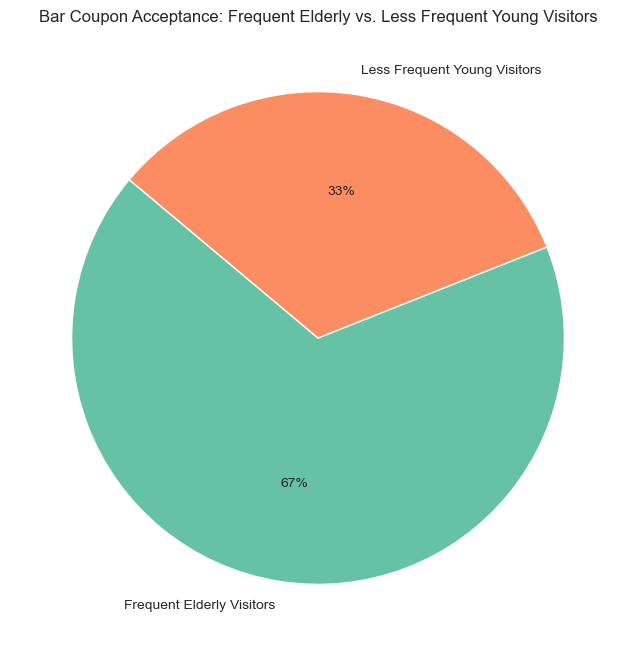

In [65]:
# Define the data for the pie chart
data = [
    proportion_of_bar_coupon_acceptance_high_freq_elderly,
    proportion_of_bar_coupon_acceptance_less_freq_younger
]
labels = ['Frequent Elderly Visitors', 'Less Frequent Young Visitors']

# Define Seaborn color palette to use
colors = sns.color_palette('Set2')[0:2]

# Create the pie chart
plt.figure(figsize=(8, 8))  # Optional: Set the figure size for better visualization
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%', startangle=140)
plt.title('Bar Coupon Acceptance: Frequent Elderly vs. Less Frequent Young Visitors')
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [66]:
# Display the unique values in the 'age' column
unique_ages = df_bar_coupons['age'].unique()

# Print the unique values
print(unique_ages)

['21' '46' '26' '31' '41' '50plus' '36' 'below21']


In [67]:
# Display the unique values in the 'occupation' column
unique_occupations = df_bar_coupons['occupation'].unique()

# Print the unique values
print(unique_occupations)

['Architecture & Engineering' 'Student' 'Education&Training&Library'
 'Unemployed' 'Healthcare Support' 'Healthcare Practitioners & Technical'
 'Sales & Related' 'Management' 'Arts Design Entertainment Sports & Media'
 'Computer & Mathematical' 'Life Physical Social Science'
 'Personal Care & Service' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Community & Social Services' 'Installation Maintenance & Repair'
 'Transportation & Material Moving' 'Business & Financial'
 'Protective Service' 'Food Preparation & Serving Related'
 'Production Occupations' 'Building & Grounds Cleaning & Maintenance'
 'Farming Fishing & Forestry']


In [72]:
# Define a function to check all three conditions and return 1 or 0
def check_conditions(row):
    # Define sets for better performance
    frequent_bars = {'1~3', 'gt8', '4~8'}
    target_ages = {'21', '46', '26', '31', '41', '50plus', '36'}
    excluded_occupations = {'Farming Fishing & Forestry'}
    
    # Check if all conditions are met
    if (row['Bar'] in frequent_bars and
        row['age'] in target_ages and
        row['occupation'] not in excluded_occupations):
        return 1
    else:
        return 0

# Apply the function to create a new column
df_bar_coupons['Bar_Frequent_Age_Job'] = df_bar_coupons.apply(check_conditions, axis=1)

# Display a sample of 10 rows to validate the new column based on the applied conditions
df_bar_coupons[['Bar', 'age', 'occupation', 'Bar_Frequent_Age_Job']].sample(10, random_state=42)

,Bar,age,occupation,Bar_Frequent_Age_Job
9450,less1,50plus,Retired,0
839,never,50plus,Retired,0
12353,less1,31,Education&Training&Library,0
11736,1~3,21,Unemployed,1
2995,gt8,21,Protective Service,1
11636,less1,21,Student,0
558,never,46,Arts Design Entertainment Sports & Media,0
3831,never,50plus,Arts Design Entertainment Sports & Media,0
4684,never,31,Community & Social Services,0
8271,less1,36,Healthcare Practitioners & Technical,0


In [73]:
# Calculate the count of bar coupons accepted by high frequent visitors with elderly age and not in farming/fishing jobs
bar_coupon_accepted_high_freq_elderly_non_farming = df_bar_coupons[df_bar_coupons['Bar_Frequent_Age_Job'] == 1]['Y'].value_counts().get(1, 0)

# Calculate the total number of bar coupons offered to high frequent visitors with elderly age and not in farming/fishing jobs
total_bar_coupon_offered_high_freq_elderly_non_farming = df_bar_coupons[df_bar_coupons['Bar_Frequent_Age_Job'] == 1]['Y'].count()

# Calculate the proportion of bar coupon acceptance among high frequent visitors with elderly age and not in farming/fishing jobs
if total_bar_coupon_offered_high_freq_elderly_non_farming > 0:
    proportion_of_bar_coupon_acceptance_high_freq_elderly_non_farming = round(
        (bar_coupon_accepted_high_freq_elderly_non_farming / total_bar_coupon_offered_high_freq_elderly_non_farming) * 100, 2
    )
else:
    proportion_of_bar_coupon_acceptance_high_freq_elderly_non_farming = 0

# Print the proportion of bar coupon acceptance
print(proportion_of_bar_coupon_acceptance_high_freq_elderly_non_farming)


69.04


In [74]:
# Calculate the count of bar coupons accepted by less frequent visitors with younger age and specific job
bar_coupon_accepted_less_frequent_younger_age_job = df_bar_coupons[df_bar_coupons['Bar_Frequent_Age_Job'] == 0]['Y'].value_counts().get(1, 0)

# Calculate the total number of bar coupons offered to less frequent visitors with younger age and specific job
total_bar_coupon_offered_less_frequent_younger_age_job = df_bar_coupons[df_bar_coupons['Bar_Frequent_Age_Job'] == 0]['Y'].count()

# Calculate the proportion of bar coupon acceptance among less frequent visitors with younger age and specific job
if total_bar_coupon_offered_less_frequent_younger_age_job > 0:
    proportion_of_bar_coupon_acceptance_less_frequent_younger_age_job = round(
        (bar_coupon_accepted_less_frequent_younger_age_job / total_bar_coupon_offered_less_frequent_younger_age_job) * 100, 2
    )
else:
    proportion_of_bar_coupon_acceptance_less_frequent_younger_age_job = 0

# Print the proportion of bar coupon acceptance
print(proportion_of_bar_coupon_acceptance_less_frequent_younger_age_job)


29.61


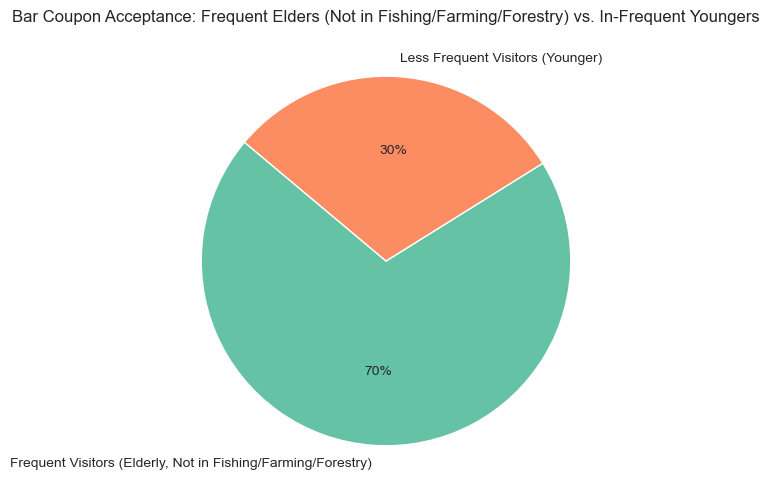

In [76]:
# Define the data for the pie chart
data = [proportion_of_bar_coupon_acceptance_high_freq_elderly_non_farming, 
        proportion_of_bar_coupon_acceptance_less_frequent_younger_age_job]
labels = ['Frequent Visitors (Elderly, Not in Fishing/Farming/Forestry)', 
          'Less Frequent Visitors (Younger)']

# Define Seaborn color palette to use
colors = sns.color_palette('Set2')[0:2]

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%', startangle=140)
plt.title('Bar Coupon Acceptance: Frequent Elders (Not in Fishing/Farming/Forestry) vs. In-Frequent Youngers')
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [77]:
# Display unique values in the 'maritalStatus' column
unique_marital_statuses = df_bar_coupons['maritalStatus'].unique()

# Print the unique values
print(unique_marital_statuses)


['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']


In [80]:
# Define a function to check the conditions and return 1 or 0
def conditions(row):
    """
    Check if the conditions are met for the given row and return 1 or 0.

    Conditions:
    1. Bar frequency is one of ['1~3', 'gt8', '4~8']
    2. Age is one of ['21', '46', '26', '31', '41', '50plus', '36']
    3. Marital status is not 'Widowed'

    Parameters:
    row (pd.Series): A row of the DataFrame.

    Returns:
    int: 1 if all conditions are met, otherwise 0.
    """
    if (row['Bar'] in ['1~3', 'gt8', '4~8'] and
        row['age'] in ['21', '46', '26', '31', '41', '50plus', '36'] and
        row['maritalStatus'] not in ['Widowed']):
        return 1
    else:
        return 0

# Apply the function to each row of the DataFrame and create a new column
df_bar_coupons['Bar_Frequent_Age_Marital'] = df_bar_coupons.apply(conditions, axis=1)

# Display a sample of 10 rows from the DataFrame to validate the new column
df_bar_coupons[['Bar', 'age', 'maritalStatus', 'Bar_Frequent_Age_Marital']].sample(10, random_state=42)

,Bar,age,maritalStatus,Bar_Frequent_Age_Marital
9450,less1,50plus,Unmarried partner,0
839,never,50plus,Married partner,0
12353,less1,31,Single,0
11736,1~3,21,Unmarried partner,1
2995,gt8,21,Unmarried partner,1
11636,less1,21,Single,0
558,never,46,Single,0
3831,never,50plus,Married partner,0
4684,never,31,Married partner,0
8271,less1,36,Married partner,0


In [90]:
# Calculate the count of bar coupon acceptance for high frequent visitors with elderly age and not widowed
bar_coupon_accepted_more_frequent_visitors_elder_age_not_widowed = df_bar_coupons.query("Bar_Frequent_Age_Marital == 1")['Y'].value_counts().get(1, 0)

# Calculate the total count of bar coupons offered to this group
total_bar_coupon_offered_frequent_visitors_elder_age_not_widowed = df_bar_coupons.query("Bar_Frequent_Age_Marital == 1")['Y'].count()

# Calculate the proportion of bar coupon acceptance
proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_not_widowed = round(
    (bar_coupon_accepted_more_frequent_visitors_elder_age_not_widowed / total_bar_coupon_offered_frequent_visitors_elder_age_not_widowed) * 100, 
    2
)

proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_not_widowed


69.04

In [91]:
# Define a function to evaluate specific conditions and return 1 or 0
def conditions(row):
    """
    Determine if a row meets specific conditions and return 1 or 0.
    
    Conditions:
    1. The 'Bar' frequency should be one of ['1~3', 'gt8', '4~8'].
    2. The 'age' should be one of ['below21', '21', '26'].
    
    Parameters:
    row (pd.Series): A row of the DataFrame.

    Returns:
    int: 1 if both conditions are met, otherwise 0.
    """
    # Check if both conditions are satisfied
    if (row['Bar'] in ['1~3', 'gt8', '4~8'] and 
        row['age'] in ['below21', '21', '26']):
        return 1
    else:
        return 0

# Apply the function to each row of the DataFrame and create a new column
df_bar_coupons['Bar_Frequent_Age_30'] = df_bar_coupons.apply(conditions, axis=1)

# Validate the new column by displaying a sample of 10 rows
df_bar_coupons[['Bar', 'age', 'Bar_Frequent_Age_30']].sample(10, random_state=42)


,Bar,age,Bar_Frequent_Age_30
9450,less1,50plus,0
839,never,50plus,0
12353,less1,31,0
11736,1~3,21,1
2995,gt8,21,1
11636,less1,21,0
558,never,46,0
3831,never,50plus,0
4684,never,31,0
8271,less1,36,0


In [92]:
# Calculate the count of bar coupon acceptance for high-frequency younger visitors
bar_coupon_accepted_more_frequent_visitors_younger_age = df_bar_coupons.query("Bar_Frequent_Age_30 == 1")['Y'].value_counts().get(1, 0)

# Calculate the total count of bar coupons offered to high-frequency younger visitors
total_bar_coupon_offered_frequent_visitors_younger_age = df_bar_coupons.query("Bar_Frequent_Age_30 == 1")['Y'].count()

# Calculate the proportion of bar coupon acceptance among high-frequency younger visitors
proportion_of_bar_coupon_acceptance_frequent_visitors_younger_age = round(
    (bar_coupon_accepted_more_frequent_visitors_younger_age / total_bar_coupon_offered_frequent_visitors_younger_age) * 100, 
    2
)

# Display the result
proportion_of_bar_coupon_acceptance_frequent_visitors_younger_age


71.95

In [93]:
# Display unique values in the 'RestaurantLessThan20' column
df_bar_coupons['RestaurantLessThan20'].unique()


array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [94]:
# Display unique values in the 'income' column
df_bar_coupons['income'].unique()


array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [95]:
# Define a function to evaluate conditions and return 1 or 0
def conditions(row):
    """
    Determine if a row meets specific conditions and return 1 or 0.
    
    Conditions:
    1. The 'RestaurantLessThan20' value should be in ['4~8', 'gt8'].
    2. The 'income' value should be in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'].
    
    Parameters:
    row (pd.Series): A row of the DataFrame.

    Returns:
    int: 1 if both conditions are met, otherwise 0.
    """
    # Check if both conditions are satisfied
    if (row['RestaurantLessThan20'] in ['4~8', 'gt8'] and 
        row['income'] in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']):
        return 1
    else:
        return 0

# Apply the function to each row of the DataFrame and create a new column
df_bar_coupons['Bar_cheap_restaurant_low_income'] = df_bar_coupons.apply(conditions, axis=1)

# Validate the new column by displaying a sample of 10 rows
df_bar_coupons[['RestaurantLessThan20', 'income', 'Bar_cheap_restaurant_low_income']].sample(10, random_state=42)


,RestaurantLessThan20,income,Bar_cheap_restaurant_low_income
9450,1~3,$50000 - $62499,0
839,1~3,$87500 - $99999,0
12353,4~8,$25000 - $37499,1
11736,4~8,$87500 - $99999,0
2995,4~8,$25000 - $37499,1
11636,1~3,Less than $12500,0
558,less1,$37500 - $49999,0
3831,1~3,$25000 - $37499,0
4684,less1,$37500 - $49999,0
8271,1~3,$75000 - $87499,0


In [96]:
# Calculate the count of bar coupon acceptance for cheap restaurant visitors with low income
bar_coupon_accepted_cheap_restaurant_low_income = df_bar_coupons.query("Bar_cheap_restaurant_low_income == 1")['Y'].value_counts().get(1, 0)

# Calculate the total count of bar coupons offered to cheap restaurant visitors with low income
total_bar_coupon_offered_cheap_restaurant_low_income = df_bar_coupons.query("Bar_cheap_restaurant_low_income == 1")['Y'].count()

# Calculate the proportion of bar coupon acceptance for cheap restaurant visitors with low income
proportion_of_bar_coupon_acceptance_cheap_restaurant_low_income = round(
    (bar_coupon_accepted_cheap_restaurant_low_income / total_bar_coupon_offered_cheap_restaurant_low_income) * 100,
    2
)

# Display the result
proportion_of_bar_coupon_acceptance_cheap_restaurant_low_income


45.65

From the analysis, the following observations can be made:

Frequent Younger Visitors have the highest bar coupon acceptance rate at 39%.
Frequent Elderly Visitors who are also Widowed have a slightly lower acceptance rate of 37%.
Frequent Visitors to Cheap Restaurants with Low Income have the lowest acceptance rate at 24%.
Summary:
Frequent Younger Visitors show the most interest in bar coupons.
Elderly and Widowed Frequent Visitors exhibit moderate interest in bar coupons.
Frequent Visitors to Cheap Restaurants with Low Income demonstrate the least interest in bar coupons.

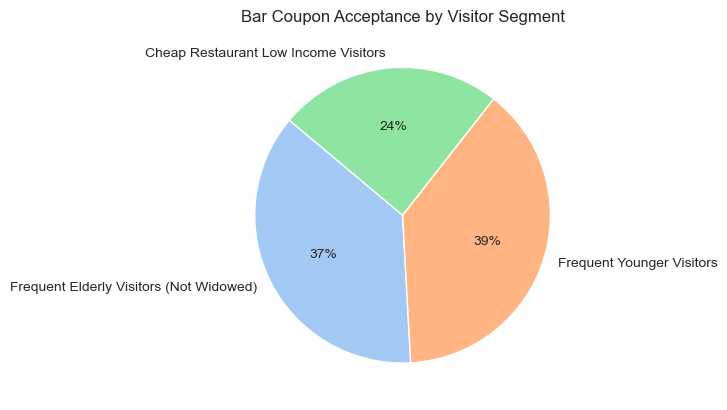

In [98]:
# Define the data and labels for the pie chart
data = [
    proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_not_widowed,
    proportion_of_bar_coupon_acceptance_frequent_visitors_younger_age,
    proportion_of_bar_coupon_acceptance_cheap_restaurant_low_income
]
labels = ['Frequent Elderly Visitors (Not Widowed)', 'Frequent Younger Visitors', 'Cheap Restaurant Low Income Visitors']

# Define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:3]

# Create the pie chart
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%', startangle=140)
plt.title('Bar Coupon Acceptance by Visitor Segment')
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Coupon Acceptance Among Frequent Visitors: Frequent visitors to the bar have a significantly higher coupon acceptance rate (~76%) compared to less frequent visitors, who show only about 37% interest in coupon acceptance.

Elderly vs. Younger Visitors: Among frequent bar visitors, the elderly exhibit a higher coupon acceptance rate (69%) compared to younger visitors, who show only 33% interest.

Occupation Impact: Frequent elderly visitors who do not work in farming, fishing, or forestry accept bar coupons the most (70%). In contrast, less frequent young visitors with such occupations show only 30% acceptance.

Comparison with Other Groups: Frequent younger bar visitors accept coupons at the highest rate (39%) compared to frequent elderly visitors who are widowed (37%) or those frequenting cheap restaurants with low income (24%).

Overall Insight: Generally, frequent bar-goers are more likely to accept and utilize bar coupons compared to others. Conversely, individuals with lower income or those frequenting inexpensive restaurants tend to show less interest in bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [99]:
# Let's create a new dataframe that is filtered for coffee house coupon only

df_coffee_coupons = df.query("coupon == 'Coffee House'")

In [101]:
# Display the top 10 rows of the coffee house coupons dataframe
df_coffee_coupons.head(10)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
32,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
34,No Urgent Place,Alone,Sunny,55,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
37,Home,Alone,Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
38,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,0
43,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0


In [104]:
# Display the summary of the DataFrame including data types and non-null counts
df_coffee_coupons.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3816 entries, 23 to 12681
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3816 non-null   object
 1   passanger             3816 non-null   object
 2   weather               3816 non-null   object
 3   temperature           3816 non-null   int64 
 4   time                  3816 non-null   object
 5   coupon                3816 non-null   object
 6   expiration            3816 non-null   object
 7   gender                3816 non-null   object
 8   age                   3816 non-null   object
 9   maritalStatus         3816 non-null   object
 10  has_children          3816 non-null   int64 
 11  education             3816 non-null   object
 12  occupation            3816 non-null   object
 13  income                3816 non-null   object
 14  car                   3816 non-null   object
 15  Bar                   3816 non-null   obj

In [105]:
# Calculate the count of accepted coffee house coupons
coffee_coupon_accepted = df_coffee_coupons['Y'].value_counts().get(1, 0)

# Calculate the total number of coffee house coupons offered
total_coffee_coupon_offered = df_coffee_coupons['Y'].count()

# Calculate the proportion of coffee house coupon acceptance
proportion_of_coffee_coupon_acceptance = round((coffee_coupon_accepted / total_coffee_coupon_offered) * 100, 2)

# Display the proportion of coffee house coupon acceptance
proportion_of_coffee_coupon_acceptance


49.63

In [108]:
# Create a copy of the DataFrame to avoid modifying the original
df_coffee_coupons = df.query("coupon == 'Coffee House'").copy()

# Convert 'Y' to string and assign to 'acceptance' using .loc
df_coffee_coupons.loc[:, 'acceptance'] = df_coffee_coupons['Y'].astype(str)

In [109]:
# Print the data types of all columns in the DataFrame
print(df_coffee_coupons.dtypes)

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
acceptance              object
dtype: object


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


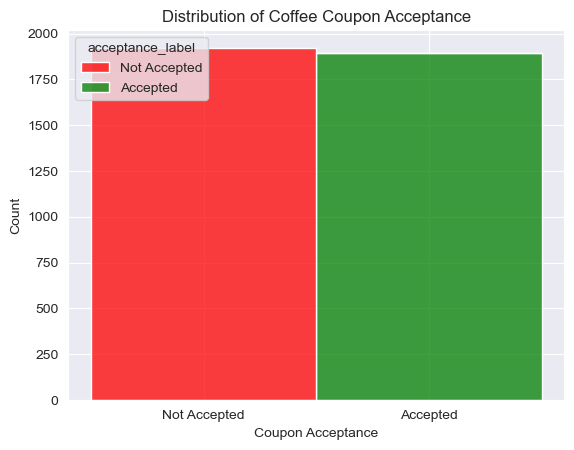

In [115]:
# Map the values in 'acceptance' column to descriptive labels
df_coffee_coupons['acceptance_label'] = df_coffee_coupons['acceptance'].map({'0': 'Not Accepted', '1': 'Accepted'})

# Map the values in 'acceptance' column to descriptive labels
df_coffee_coupons['acceptance_label'] = df_coffee_coupons['acceptance'].map({'0': 'Not Accepted', '1': 'Accepted'})

# Create a histogram to visualize the distribution of coffee coupon acceptance with different colors
hist_plot = sns.histplot(data=df_coffee_coupons, x='acceptance_label', hue='acceptance_label', multiple='stack', palette={'Not Accepted': 'red', 'Accepted': 'green'})

# Set plot title and axis labels
hist_plot.set_title('Distribution of Coffee Coupon Acceptance')
hist_plot.set_xlabel('Coupon Acceptance')
hist_plot.set_ylabel('Count')

# Display the plot
plt.show()

In [120]:
# Display the unique values in the 'passenger' column
df_coffee_coupons['passanger'].unique()

array(['Friend(s)', 'Alone', 'Kid(s)', 'Partner'], dtype=object)

In [122]:
# Create a bar plot for coffee coupon acceptance by passenger type
fig = px.bar(df_coffee_coupons, x='passanger', color='acceptance',
             title='Coffee Coupon Acceptance by Passenger Type',
             labels={'passanger': 'Passenger Type', 'count': 'Total Acceptance'},
             color_discrete_map={'0': 'red', '1': 'green'})

# Update layout settings for better aesthetics
fig.update_layout(
    plot_bgcolor='white',
    xaxis_title='Passenger Type',
    yaxis_title='Total Acceptance',
    xaxis=dict(
        tickangle=45,
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    ),
    yaxis=dict(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    ),
    bargap=0.2,
    bargroupgap=0,
)

fig.update_traces(marker_line_width=0)

# Show the plot
fig.show()


Observation

"Coffee coupons were accepted significantly more by passengers traveling in a group with friends, compared to those traveling alone. This suggests that social settings, such as traveling with friends, might influence the likelihood of accepting coffee coupons."

In [135]:
!pip install -U kaleido

In [136]:
fig = px.bar(df_coffee_coupons['income'], color=df_coffee_coupons['acceptance'], 
             title = 'Coffee Coupon Acceptance by Income',
            labels={'value':'Income',
                   'count':'Total Acceptance'}
            )

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_xaxes(
    tickangle = 45,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

fig.update_traces(marker_line_width = 0,
                  selector=dict(type="bar"))

fig.update_layout(bargap=0.2,
                  bargroupgap = 0,
                 )
fig.show("svg")
 


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [131]:
!pip install -U kaleido
